<a href="https://colab.research.google.com/github/nugi1209/BCG_Data_Virtual_Experience/blob/main/BCG_eda_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Starter

## Import packages

In [251]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

pd.options.mode.chained_assignment = None

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [160]:
client_df = pd.read_csv('https://github.com/nugi1209/BCG_Data_Virtual_Experience/blob/main/client_data.csv?raw=true')
price_df = pd.read_csv('https://github.com/nugi1209/BCG_Data_Virtual_Experience/blob/main/price_data.csv?raw=true')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [161]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [162]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [163]:
client_df.shape

(14606, 26)

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [164]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [165]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [166]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [167]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [168]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

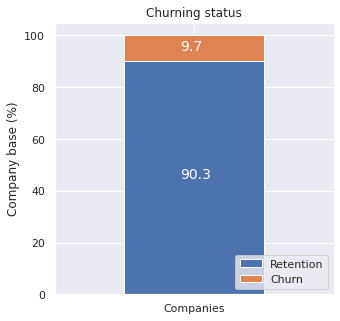

In [169]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

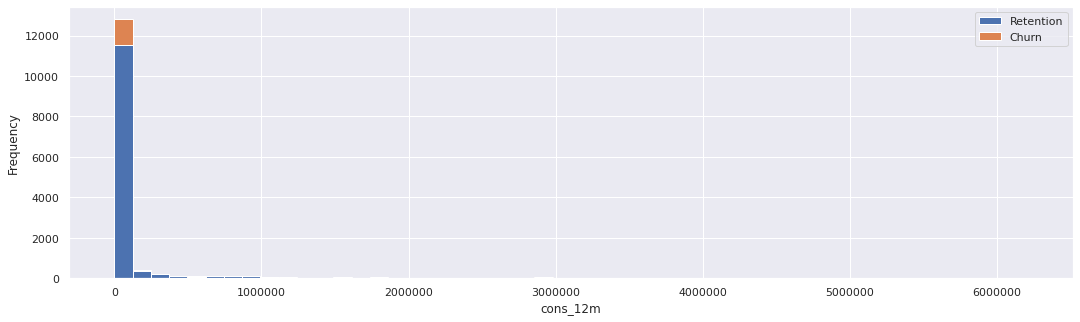

In [170]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [171]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

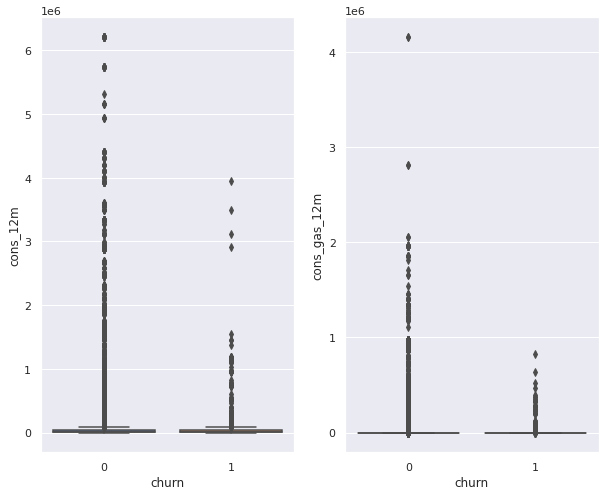

In [172]:
# plt.figure(figsize=(20,15))
f, axes = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(data=client_df, x='churn', y='cons_12m', ax=axes[0])
sns.boxplot(data=client_df, x='churn', y='cons_gas_12m', ax=axes[1])

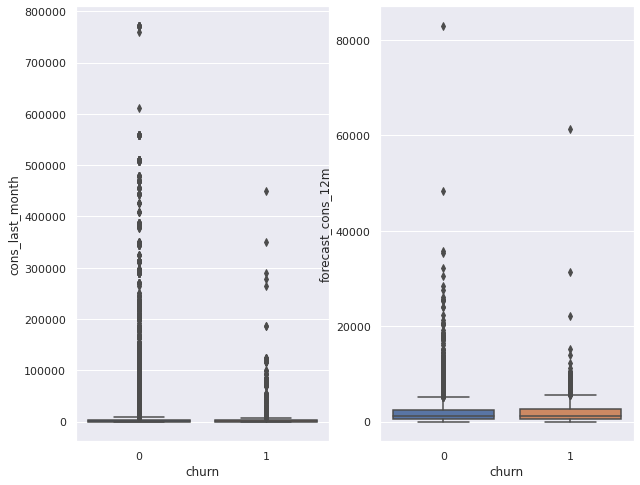

In [173]:
f, axes = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(data=client_df, x='churn', y='cons_last_month', ax=axes[0])
sns.boxplot(data=client_df, x='churn', y='forecast_cons_12m', ax=axes[1])

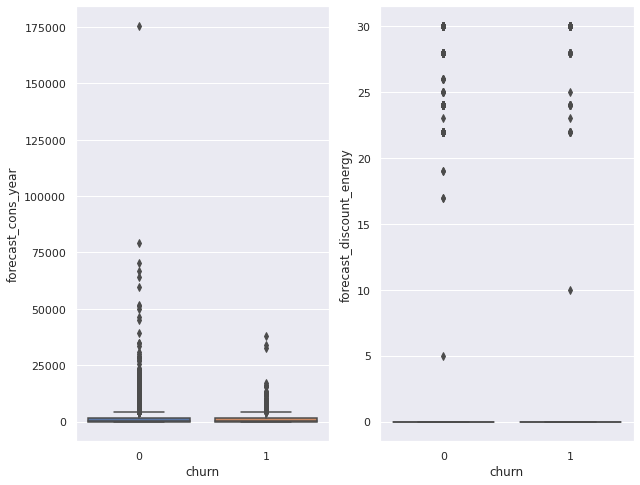

In [174]:
f, axes = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(data=client_df, x='churn', y='forecast_cons_year', ax=axes[0])
sns.boxplot(data=client_df, x='churn', y='forecast_discount_energy', ax=axes[1])

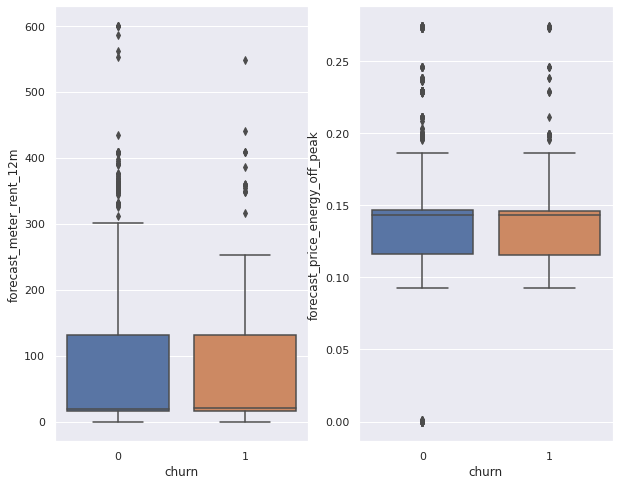

In [175]:
f, axes = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(data=client_df, x='churn', y='forecast_meter_rent_12m', ax=axes[0])
sns.boxplot(data=client_df, x='churn', y='forecast_price_energy_off_peak', ax=axes[1])

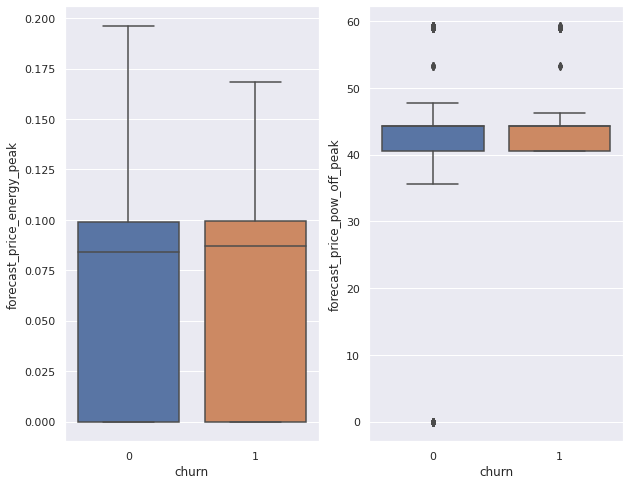

In [176]:
f, axes = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(data=client_df, x='churn', y='forecast_price_energy_peak', ax=axes[0])
sns.boxplot(data=client_df, x='churn', y='forecast_price_pow_off_peak', ax=axes[1])


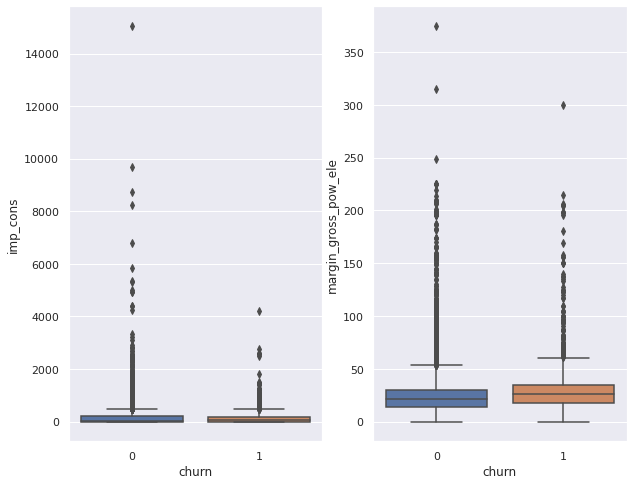

In [177]:
f, axes = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(data=client_df, x='churn', y='imp_cons', ax=axes[0])
sns.boxplot(data=client_df, x='churn', y='margin_gross_pow_ele', ax=axes[1])

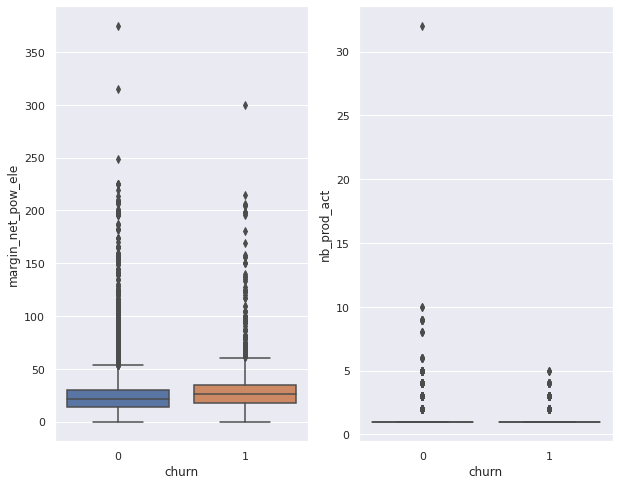

In [178]:
f, axes = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(data=client_df, x='churn', y='margin_net_pow_ele', ax=axes[0])
sns.boxplot(data=client_df, x='churn', y='nb_prod_act', ax=axes[1])


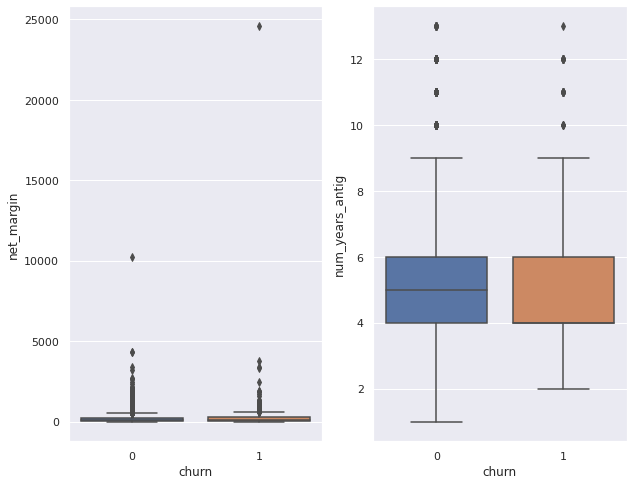

In [179]:
f, axes = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(data=client_df, x='churn', y='net_margin', ax=axes[0])
sns.boxplot(data=client_df, x='churn', y='num_years_antig', ax=axes[1])


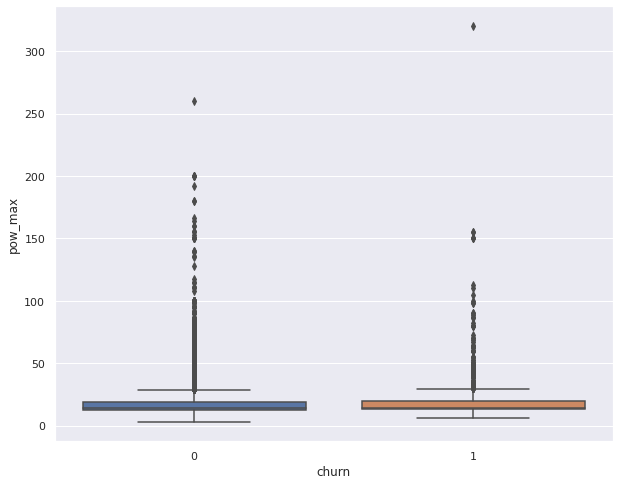

In [180]:
f, axes = plt.subplots(1, 1, figsize=(10,8))
sns.boxplot(data=client_df, x='churn', y='pow_max')

In [181]:
chn_sl = client_df.dropna(subset=['channel_sales'])
chn_sl['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

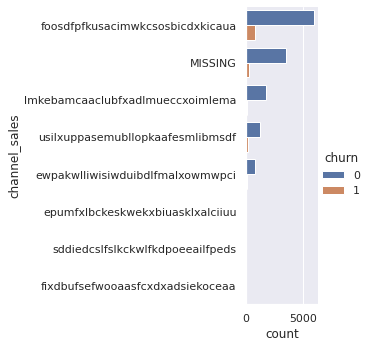

In [182]:
sns.catplot(data=chn_sl, y='channel_sales', hue='churn', kind='count')

In [183]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

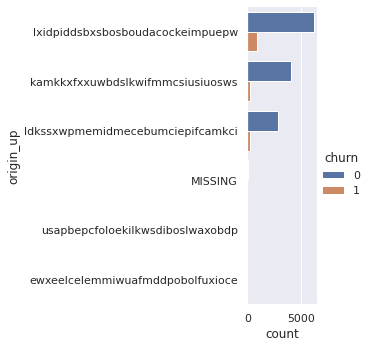

In [184]:
sns.catplot(data=client_df, y='origin_up', hue='churn', kind='count')

In [185]:
client_df.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [186]:
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])

In [187]:
client_df['date_activ_dif'] = (client_df['date_activ'].max() - client_df['date_activ']).dt.days

client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_activ_dif
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,443
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,1837
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,1599
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,1616
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,1692


In [188]:
dt_act = client_df.groupby(['date_activ_dif', 'churn'])['id'].count().reset_index()
dt_act.head()

,date_activ_dif,churn,id
0,0,0,1
1,297,0,1
2,300,1,1
3,305,0,1
4,308,0,1


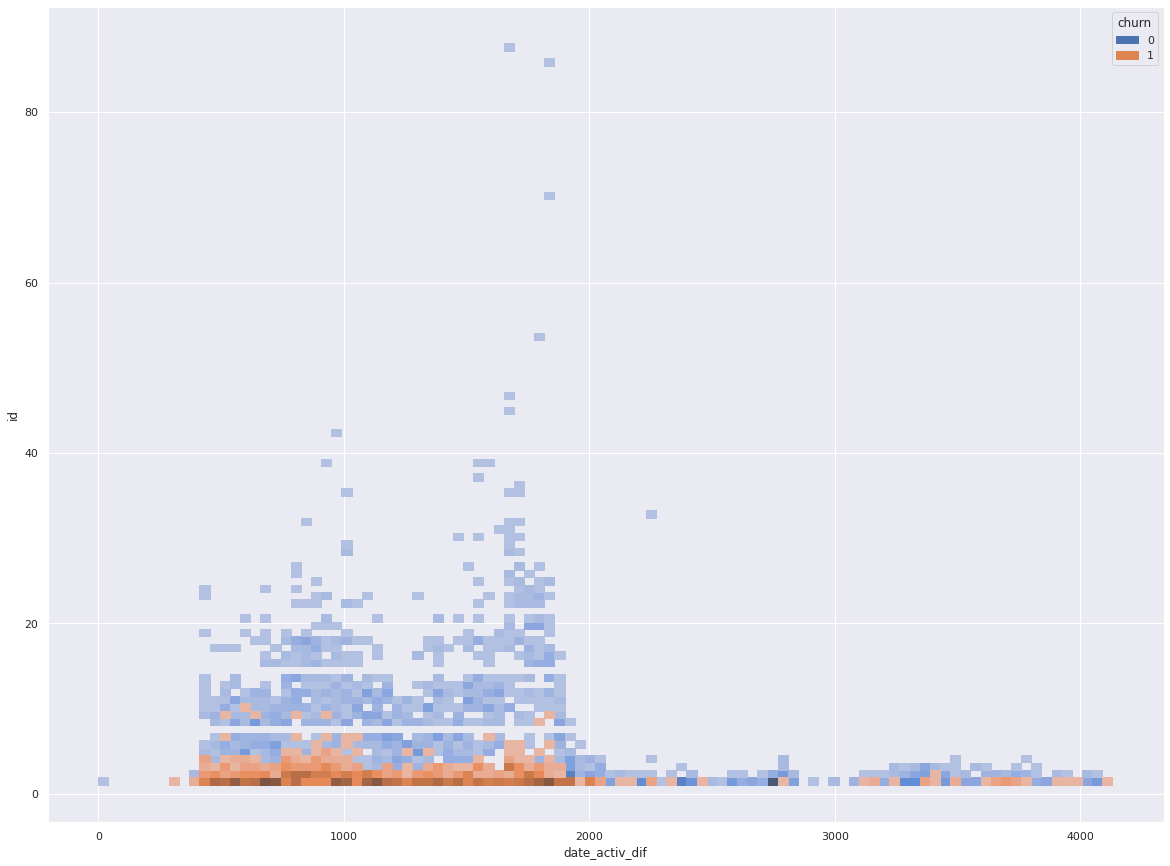

In [189]:
plt.figure(figsize=(20,15))
sns.histplot(data=dt_act, x='date_activ_dif', y='id', hue='churn', bins=100)

In [190]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [191]:
price_df['price_date'].min()

'2015-01-01'

In [192]:
price_df['price_date'].max()

'2015-12-01'

In [193]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'])


In [194]:
price_df['month'] = pd.DatetimeIndex(price_df['price_date']).month
price_df['week'] = price_df['price_date'].dt.isocalendar().week

In [195]:
price_df.shape

(193002, 10)

In [196]:
# price_df.loc[price_df['month']==12]

In [197]:
# price_df = price_df[price_df['month']!=12]

In [198]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'month', 'week'],
      dtype='object')

In [199]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,month,week
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,1,1
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,2,5
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3,9
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,4,14
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,5,18


In [200]:
price_df['price_total'] = price_df['price_off_peak_var'] + price_df['price_peak_var'] + price_df['price_mid_peak_var']+ price_df['price_off_peak_fix'] + price_df['price_peak_fix'] + price_df['price_mid_peak_fix']
price_df.head()


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,month,week,price_total
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,1,1,44.418298
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,2,5,44.418298
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3,9,44.418298
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,4,14,44.416557
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,5,18,44.416557


In [201]:
pr_ttl_dy_avg = price_df.groupby(['id', 'month'])['price_total'].mean().reset_index()
pr_ttl_dy_avg = price_df.groupby(['id'])['price_total'].mean().reset_index()
pr_ttl_dy_avg = pr_ttl_dy_avg.rename(columns={'price_total':'pr_ttl_dy_avg'})
pr_ttl_dy_avg

,id,pr_ttl_dy_avg
0,0002203ffbb812588b632b9e628cc38d,81.704757
1,0004351ebdd665e6ee664792efc4fd13,44.531877
2,0010bcc39e42b3c2131ed2ce55246e3c,45.501268
3,0010ee3855fdea87602a5b7aba8e42de,81.580935
4,00114d74e963e47177db89bc70108537,44.414856
...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,82.376624
16092,fffac626da707b1b5ab11e8431a4d0a2,44.458512
16093,fffc0cacd305dd51f316424bbb08d1bd,83.197725
16094,fffe4f5646aa39c7f97f95ae2679ce64,81.514487


In [202]:
pr_last_mn = price_df.groupby(['id'])['month'].max().reset_index()
pr_last_mn['month'].unique()

array([12, 10, 11])

In [203]:
pr_last_mn.shape

(16096, 2)

In [204]:
price_df.shape

(193002, 11)

In [205]:
pr_last_mn = pd.merge(pr_last_mn, price_df, on=['id', 'month'])
pr_last_mn.shape

(16096, 11)

In [206]:
pr_last_mn = pr_last_mn.groupby(['id'])['price_total'].mean().reset_index()

In [207]:
pr_last_mn = pr_last_mn.rename(columns={'price_total':'avg_pr_ttl_lst_mn'})
pr_last_mn.head()

,id,avg_pr_ttl_lst_mn
0,0002203ffbb812588b632b9e628cc38d,81.753068
1,0004351ebdd665e6ee664792efc4fd13,44.588653
2,0010bcc39e42b3c2131ed2ce55246e3c,46.145990
3,0010ee3855fdea87602a5b7aba8e42de,81.735632
4,00114d74e963e47177db89bc70108537,44.412370


In [208]:
client_df.shape

(14606, 27)

In [209]:
pr_ttl_sum = price_df.groupby(['id'])['price_total'].sum().reset_index()
pr_ttl_sum = pr_ttl_sum.rename(columns={'price_total':'pr_ttl_sum'})
pr_ttl_sum.head()

,id,pr_ttl_sum
0,0002203ffbb812588b632b9e628cc38d,980.457088
1,0004351ebdd665e6ee664792efc4fd13,534.382522
2,0010bcc39e42b3c2131ed2ce55246e3c,546.015222
3,0010ee3855fdea87602a5b7aba8e42de,978.971226
4,00114d74e963e47177db89bc70108537,532.978274


In [210]:
cl_ft = pd.merge(pr_last_mn, client_df, on=['id'])
cl_ft = pd.merge(pr_ttl_dy_avg, cl_ft, on=['id'])
cl_ft = pd.merge(pr_ttl_sum, cl_ft, on=['id'])

In [211]:
cl_ft.shape

(14606, 30)

In [212]:
pr_ttl_dy_avg_hist = cl_ft.groupby(['pr_ttl_dy_avg', 'churn'])['id'].count().reset_index()
pr_ttl_dy_avg_hist.head()

,pr_ttl_dy_avg,churn,id
0,0.000000,0,20
1,0.000600,0,74
2,0.000901,0,6
3,0.019049,0,1
4,0.028273,0,1


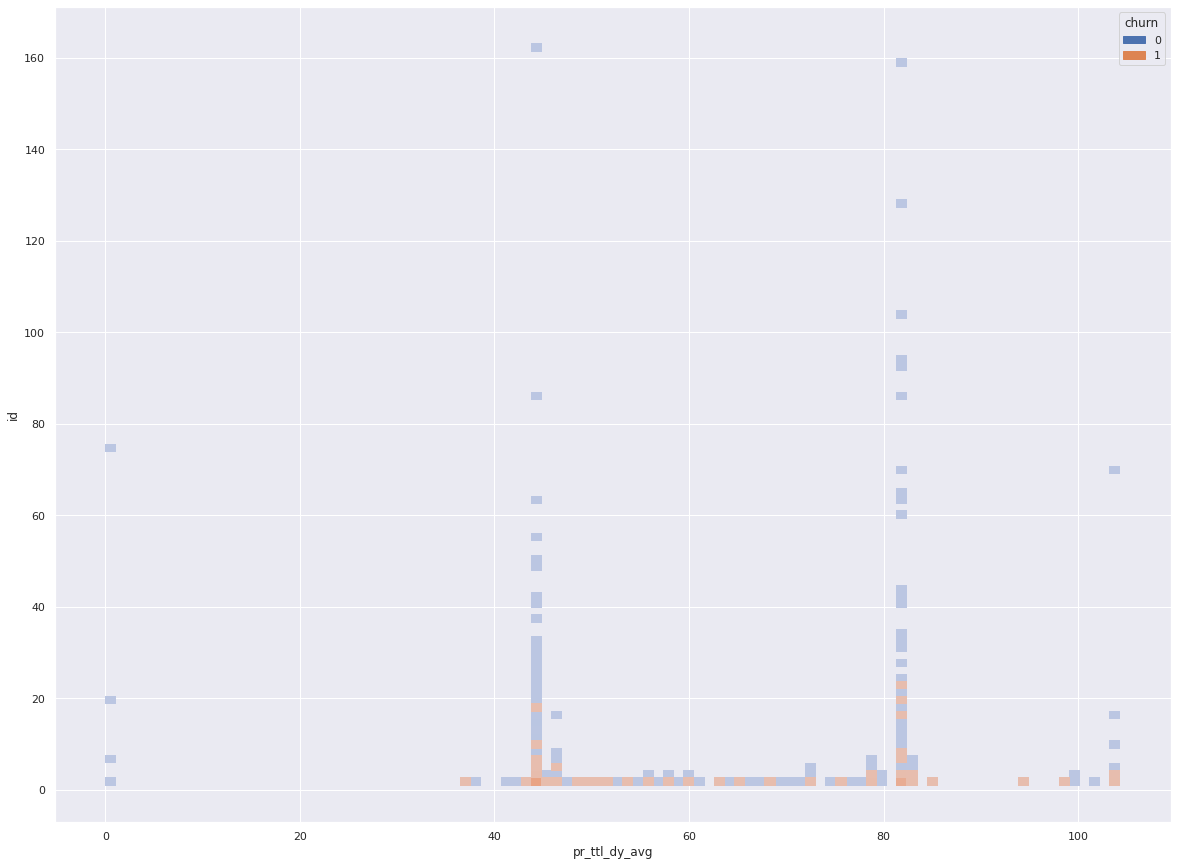

In [213]:
plt.figure(figsize=(20,15))
sns.histplot(data=pr_ttl_dy_avg_hist, x='pr_ttl_dy_avg', y='id', hue='churn', bins=100)

In [214]:
avg_pr_ttl_lst_mn_hist = cl_ft.groupby(['avg_pr_ttl_lst_mn', 'churn'])['id'].count().reset_index()
avg_pr_ttl_lst_mn_hist.head()

,avg_pr_ttl_lst_mn,churn,id
0,0.000000,0,25
1,0.000000,1,1
2,0.000600,0,74
3,0.000901,0,6
4,0.111292,0,5


In [215]:
avg_pr_ttl_lst_mn_hist = cl_ft.groupby(['avg_pr_ttl_lst_mn', 'churn'])['id'].count().reset_index()
avg_pr_ttl_lst_mn_hist.head()

,avg_pr_ttl_lst_mn,churn,id
0,0.000000,0,25
1,0.000000,1,1
2,0.000600,0,74
3,0.000901,0,6
4,0.111292,0,5


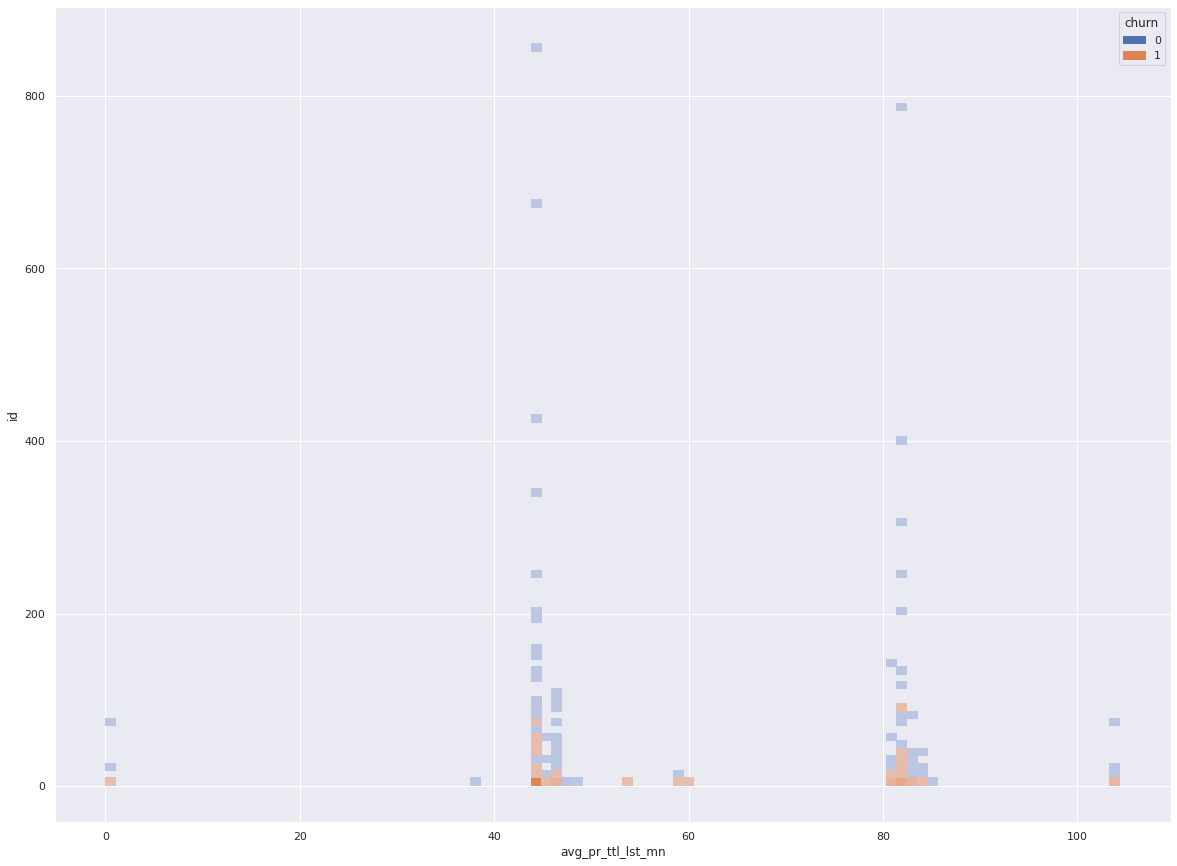

In [216]:
plt.figure(figsize=(20,15))
sns.histplot(data=avg_pr_ttl_lst_mn_hist, x='avg_pr_ttl_lst_mn', y='id', hue='churn', bins=100)

In [217]:
pr_ttl_sum_hist = cl_ft.groupby(['pr_ttl_sum', 'churn'])['id'].count().reset_index()
pr_ttl_sum_hist.head()

,pr_ttl_sum,churn,id
0,0.000000,0,20
1,0.007200,0,74
2,0.010812,0,6
3,0.228584,0,1
4,0.339276,0,1


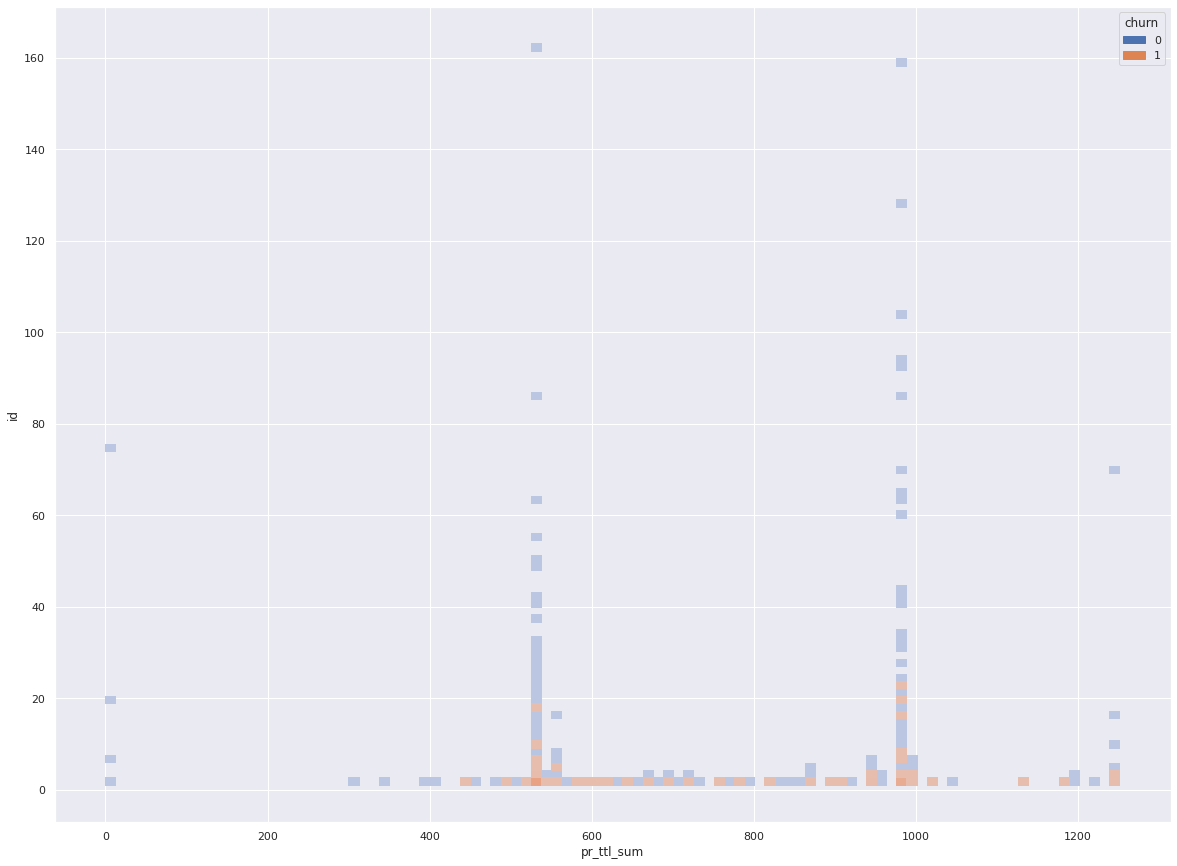

In [218]:
plt.figure(figsize=(20,15))
sns.histplot(data=pr_ttl_sum_hist, x='pr_ttl_sum', y='id', hue='churn', bins=100)

CONCLUSION: It's not clearly visible from the graphs regarding whether price sensitivity contributed significantly to customer churn.

In [219]:
cl_ft["date_activ"] = pd.to_datetime(cl_ft["date_activ"], format='%Y-%m-%d')
cl_ft["date_end"] = pd.to_datetime(cl_ft["date_end"], format='%Y-%m-%d')
cl_ft["date_modif_prod"] = pd.to_datetime(cl_ft["date_modif_prod"], format='%Y-%m-%d')
cl_ft["date_renewal"] = pd.to_datetime(cl_ft["date_renewal"], format='%Y-%m-%d')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')

In [220]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [221]:
cl_ft.shape

(14606, 30)

In [222]:
cl_ft = pd.merge(diff, cl_ft, on=['id'])

cl_ft.shape

(14606, 32)

In [223]:
cl_ft.columns

Index(['id', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_january_power', 'pr_ttl_sum', 'pr_ttl_dy_avg',
       'avg_pr_ttl_lst_mn', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'date_activ_dif'],
      dtype='object')

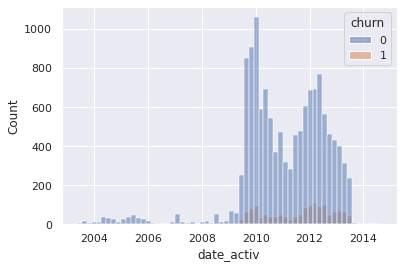

In [224]:
sns.histplot(cl_ft, x='date_activ', hue='churn')

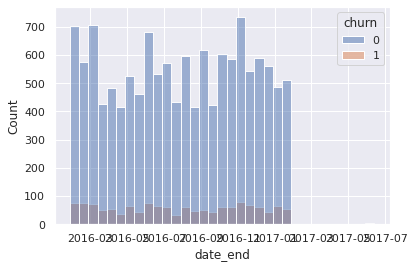

In [225]:
sns.histplot(cl_ft, x='date_end', hue='churn')

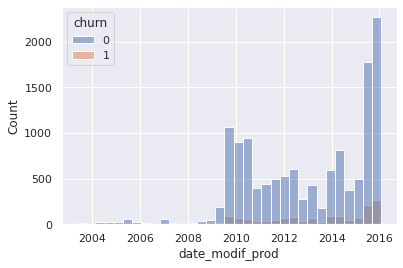

In [226]:
sns.histplot(cl_ft, x='date_modif_prod', hue='churn')

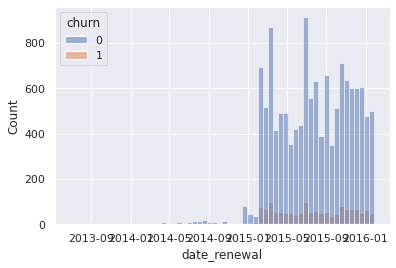

In [227]:
sns.histplot(cl_ft, x='date_renewal', hue='churn')

In [228]:
cl_ft['date_modif_prod_dif'] = (cl_ft['date_modif_prod'].max() - cl_ft['date_modif_prod']).dt.days

cl_ft.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,pr_ttl_sum,pr_ttl_dy_avg,avg_pr_ttl_lst_mn,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_activ_dif,date_modif_prod_dif
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,980.457088,81.704757,81.753068,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.116900,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250,0,1686,2201
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,534.382522,44.531877,44.588653,MISSING,4060,0,0,2009-08-06,2016-06-21,2013-06-21,2015-06-23,597.77,0,0.0,6.84,0.142065,0.000000,44.311378,f,0.00,24.42,24.42,1,61.58,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,1852,952
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,546.015222,45.501268,46.145990,usilxuppasemubllopkaafesmlibmsdf,7440,0,1062,2013-02-25,2016-05-05,2015-05-05,2015-02-26,1311.16,1062,30.0,18.37,0.199230,0.000000,45.806878,f,213.76,38.58,38.58,2,81.61,3,lxidpiddsbxsbosboudacockeimpuepw,13.856,0,553,269
3,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,532.978274,44.414856,44.412370,ewpakwlliwisiwduibdlfmalxowmwpci,11272,0,0,2010-03-02,2016-03-02,2010-03-02,2015-03-09,1671.41,0,0.0,18.27,0.144149,0.000000,44.311378,f,0.00,29.76,29.76,1,157.99,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,1644,2159
4,0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000,981.171702,81.764308,81.758290,foosdfpfkusacimwkcsosbicdxkicaua,267414,0,19394,2013-02-22,2016-02-22,2014-10-07,2015-02-26,3077.34,1760,0.0,144.86,0.118636,0.101750,40.606701,f,195.20,30.00,30.00,1,341.58,3,lxidpiddsbxsbosboudacockeimpuepw,20.000,0,556,479


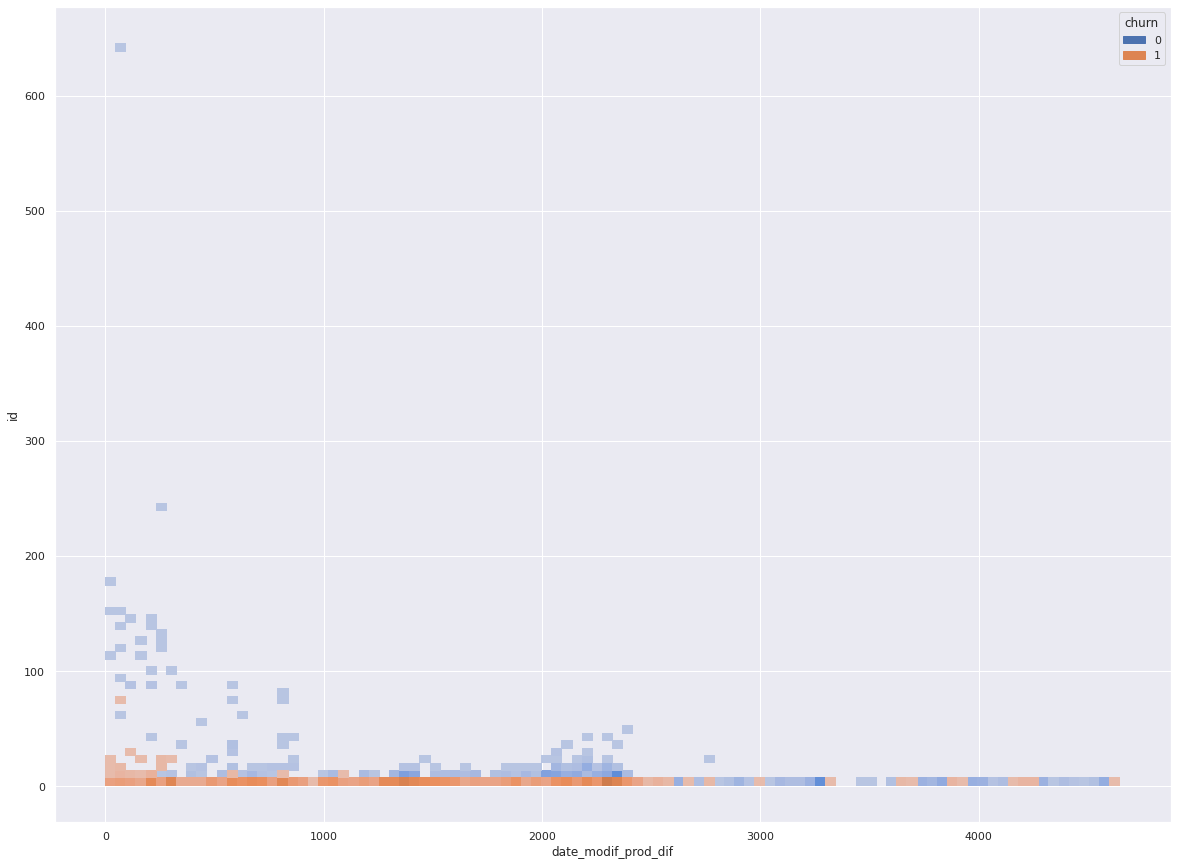

In [229]:
cl_ft_modif_prod = cl_ft.groupby(['date_modif_prod_dif', 'churn'])['id'].count().reset_index()

plt.figure(figsize=(20,15))
sns.histplot(data=cl_ft_modif_prod, x='date_modif_prod_dif', y='id', hue='churn', bins=100)

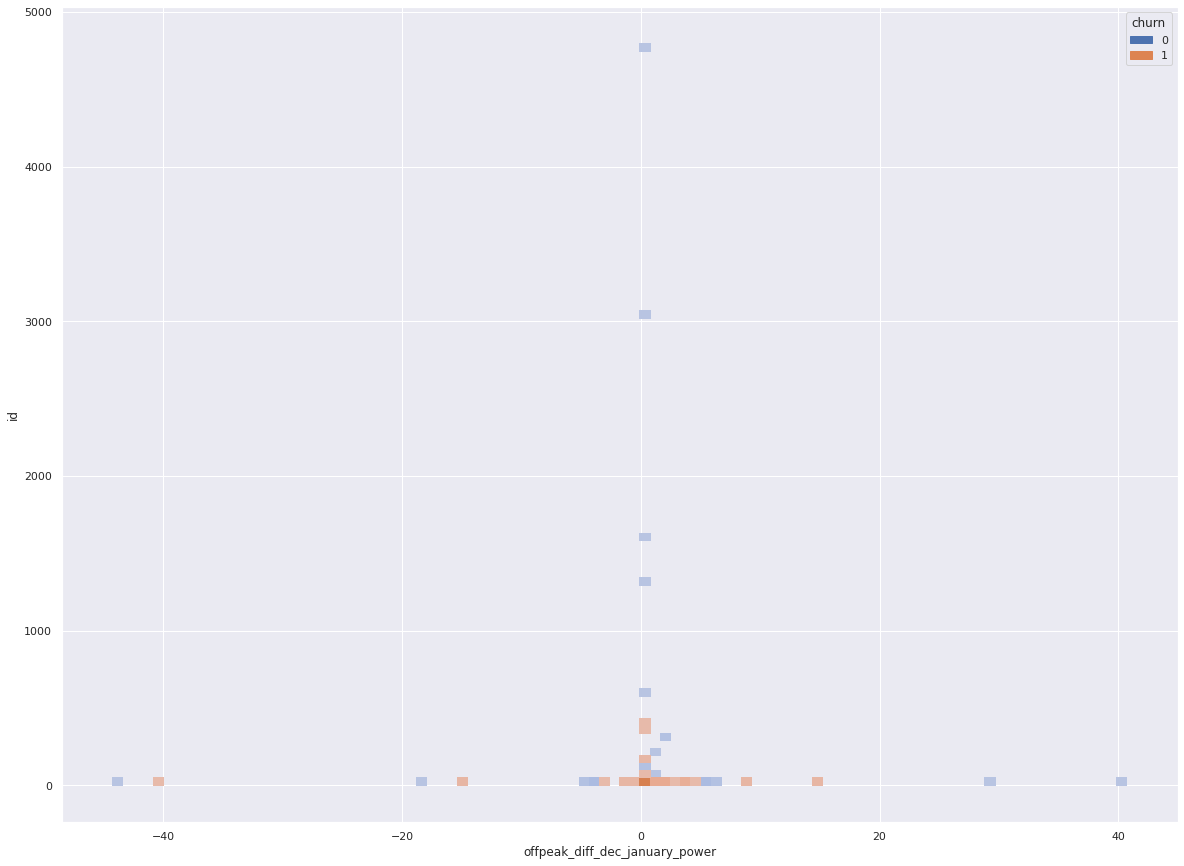

In [230]:
jan_dec_dif_pow_hist = cl_ft.groupby(['offpeak_diff_dec_january_power', 'churn'])['id'].count().reset_index()
plt.figure(figsize=(20,15))
sns.histplot(data=jan_dec_dif_pow_hist, x='offpeak_diff_dec_january_power', y='id', hue='churn', bins=100)

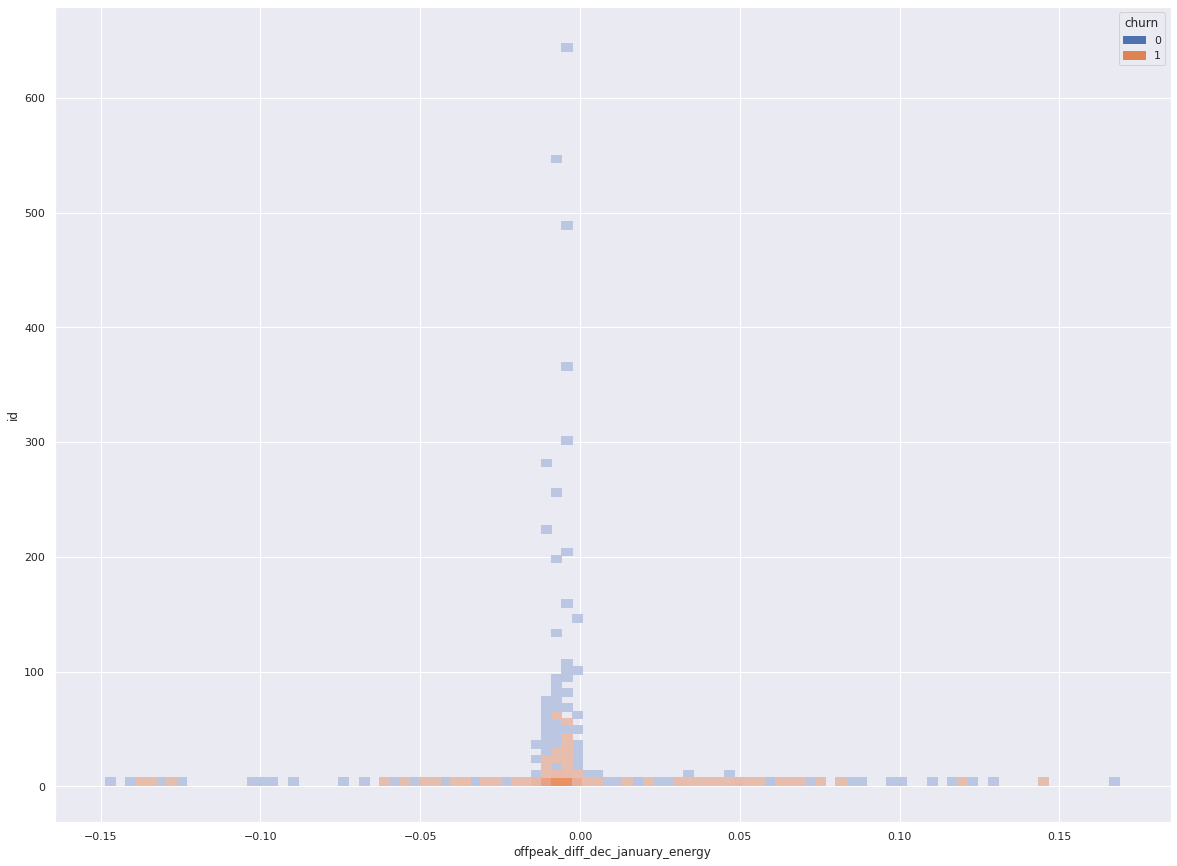

In [231]:
jan_dec_dif_en_hist = cl_ft.groupby(['offpeak_diff_dec_january_energy', 'churn'])['id'].count().reset_index()
plt.figure(figsize=(20,15))
sns.histplot(data=jan_dec_dif_en_hist, x='offpeak_diff_dec_january_energy', y='id', hue='churn', bins=100)

**Features to be used, judging from visual inspection:**

forecast_meter_rent_12m

margin_gross_pow_ele

channel_sales

origin_up

date_activ_dif

date_modif_prod_dif

avg_pr_ttl_lst_mn

--

offpeak_diff_dec_january_power

offpeak_diff_dec_january_energy

In [232]:
# df.drop(df.columns.difference(['a','b']), 1, inplace=True)


df_ft = cl_ft.drop(cl_ft.columns.difference(['forecast_meter_rent_12m',
                                             'margin_gross_pow_ele',
                                             'channel_sales',
                                             'origin_up',
                                             'date_activ_dif',
                                             'date_modif_prod_dif',
                                             'avg_pr_ttl_lst_mn',
                                             'offpeak_diff_dec_january_power',
                                             'offpeak_diff_dec_january_energy',
                                             'churn']), 1)
df_ft.head()

,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,avg_pr_ttl_lst_mn,channel_sales,forecast_meter_rent_12m,margin_gross_pow_ele,origin_up,churn,date_activ_dif,date_modif_prod_dif
0,-0.006192,0.162916,81.753068,foosdfpfkusacimwkcsosbicdxkicaua,138.95,43.08,kamkkxfxxuwbdslkwifmmcsiusiuosws,0,1686,2201
1,-0.004104,0.177779,44.588653,MISSING,6.84,24.42,kamkkxfxxuwbdslkwifmmcsiusiuosws,0,1852,952
2,0.050443,1.500000,46.145990,usilxuppasemubllopkaafesmlibmsdf,18.37,38.58,lxidpiddsbxsbosboudacockeimpuepw,0,553,269
3,-0.003994,-0.000001,44.412370,ewpakwlliwisiwduibdlfmalxowmwpci,18.27,29.76,kamkkxfxxuwbdslkwifmmcsiusiuosws,0,1644,2159
4,-0.006171,0.000000,81.758290,foosdfpfkusacimwkcsosbicdxkicaua,144.86,30.00,lxidpiddsbxsbosboudacockeimpuepw,0,556,479


In [233]:
df_ft = pd.get_dummies(data=df_ft, columns=['channel_sales', 'origin_up'])
df_ft.head()

,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,avg_pr_ttl_lst_mn,forecast_meter_rent_12m,margin_gross_pow_ele,churn,date_activ_dif,date_modif_prod_dif,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,-0.006192,0.162916,81.753068,138.95,43.08,0,1686,2201,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,-0.004104,0.177779,44.588653,6.84,24.42,0,1852,952,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.050443,1.500000,46.145990,18.37,38.58,0,553,269,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,-0.003994,-0.000001,44.412370,18.27,29.76,0,1644,2159,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,-0.006171,0.000000,81.758290,144.86,30.00,0,556,479,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [234]:
X = df_ft[df_ft.columns.difference(['churn'])]

y = df_ft['churn']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [236]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [237]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9050661798265632


In [238]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance

forecast_meter_rent_12m                           1.729992e-01
margin_gross_pow_ele                              1.714284e-01
date_activ_dif                                    1.699488e-01
date_modif_prod_dif                               1.497120e-01
offpeak_diff_dec_january_energy                   1.180521e-01
avg_pr_ttl_lst_mn                                 1.118589e-01
offpeak_diff_dec_january_power                    4.480661e-02
channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    1.169522e-02
origin_up_lxidpiddsbxsbosboudacockeimpuepw        7.745062e-03
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws        7.688006e-03
channel_sales_MISSING                             7.236545e-03
channel_sales_usilxuppasemubllopkaafesmlibmsdf    7.128070e-03
origin_up_ldkssxwpmemidmecebumciepifcamkci        7.036156e-03
channel_sales_lmkebamcaaclubfxadlmueccxoimlema    6.177585e-03
channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci    5.498615e-03
origin_up_MISSING                                 9.167

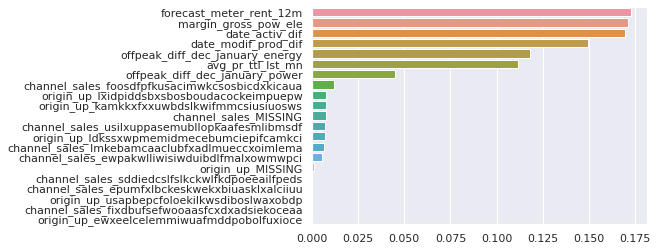

In [239]:
sns.barplot(x=feature_importance, y=feature_importance.index)

In [240]:
df_ft_disc = df_ft.loc[df_ft['churn']==1]
df_ft_disc.head()


,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,avg_pr_ttl_lst_mn,forecast_meter_rent_12m,margin_gross_pow_ele,churn,date_activ_dif,date_modif_prod_dif,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
7,0.118869,14.939999,59.482054,18.37,197.28,1,588,1103,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,-0.010039,0.177779,44.584882,19.41,22.95,1,1812,214,1,0,0,0,0,0,0,0,0,0,1,0,0,0
38,0.039823,0.662916,83.360183,131.39,70.12,1,542,281,0,0,0,0,1,0,0,0,0,0,0,1,0,0
63,-0.008161,0.000004,81.436433,129.95,27.70,1,978,1493,0,0,0,0,1,0,0,0,0,0,0,0,1,0
70,-0.007273,0.000004,81.436433,169.88,119.88,1,577,1092,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [241]:
df_ft_disc['margin_gross_pow_ele'] = 0.8 * df_ft_disc['margin_gross_pow_ele']
df_ft_disc['offpeak_diff_dec_january_power'] = 0.8 * df_ft_disc['offpeak_diff_dec_january_power']
df_ft_disc['offpeak_diff_dec_january_energy'] = 0.8 * df_ft_disc['offpeak_diff_dec_january_energy']
df_ft_disc.head()

,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,avg_pr_ttl_lst_mn,forecast_meter_rent_12m,margin_gross_pow_ele,churn,date_activ_dif,date_modif_prod_dif,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
7,0.095095,11.951999,59.482054,18.37,157.824,1,588,1103,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,-0.008031,0.142223,44.584882,19.41,18.360,1,1812,214,1,0,0,0,0,0,0,0,0,0,1,0,0,0
38,0.031858,0.530333,83.360183,131.39,56.096,1,542,281,0,0,0,0,1,0,0,0,0,0,0,1,0,0
63,-0.006529,0.000003,81.436433,129.95,22.160,1,978,1493,0,0,0,0,1,0,0,0,0,0,0,0,1,0
70,-0.005818,0.000003,81.436433,169.88,95.904,1,577,1092,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [242]:
X_test.shape
# X_test.columns

(4382, 21)

In [243]:
X_disc = df_ft_disc[df_ft_disc.columns.difference(['churn'])]
X_disc.shape
# X_disc.columns

(1419, 21)

In [244]:


y_pred_disc = clf.predict(X_disc)

y_pred_disc

array([1, 0, 0, ..., 0, 0, 0])

In [252]:
unique, counts = np.unique(y_pred_disc, return_counts=True)
dict(zip(unique, counts))

{0: 1317, 1: 102}

100* 1317/1419 = 93%

In conclusion, according to the classification model, if the churned customers had been given 20% discount, 93% of them would not had churned. So the 20% discount would decrease the churn by 93%.